<a href="https://colab.research.google.com/github/TeeshynaJ/-anime_forecasting/blob/main/Analysis_Correlation_analysis_on_many_factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EPISODES COUNT AND DURATION ON POPULARITY ANALYSIS


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv('/content/kaggle and batches.csv')

In [ ]:
data.isnull().sum()

,0
id,0
title,193
format,0
duration,27
status,0
startDay,43
startMonth,35
startYear,15
meanScore,19
popularity,0


DROP UNNECESSARY COLUMNS

In [ ]:
columns_to_keep = ['Episodes', 'duration', 'popularity','title','id']

data_cleaned = data[columns_to_keep]

data_cleaned.head()


,Episodes,duration,popularity,title,id
0,26,24.0,366380,Cowboy Bebop,1
1,26,24.0,131123,Trigun,6
2,26,25.0,17739,Witch Hunter ROBIN,7
3,52,23.0,2440,Beet the Vandel Buster,8
4,145,23.0,28038,Eyeshield 21,15


In [ ]:
data_cleaned.shape

(2772, 5)

REPLACE UNKNOWN AND BLANKS IN EPISODES COLUMN

In [ ]:
import numpy as np
data_cleaned['Episodes'].replace(['unknown', ''], np.nan, inplace=True)


<ipython-input-20-d6186192c421>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Episodes'].replace(['unknown', ''], np.nan, inplace=True)
<ipython-input-20-d6186192c421>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Episodes'].replace(['unknown', ''], np.nan, inplace=True)


In [ ]:
# Adding an 'ongoing' column
data_cleaned['ongoing'] = data['Episodes'].isna().astype(int)


<ipython-input-21-f92ee829608f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['ongoing'] = data['Episodes'].isna().astype(int)


In [ ]:
data_cleaned.isnull().sum()

,0
Episodes,1588
duration,27
popularity,0
title,193
id,0
ongoing,0


SCORE AFFECT POPULARITY?

In [ ]:
score_data=pd.read_csv('/content/kaggle and batches.csv')


In [ ]:
print(score_data.columns.tolist())


['id', 'title', 'format', 'duration', 'status', 'startDay', 'startMonth', 'startYear', 'meanScore', 'popularity', 'favourites', 'genres', 'scoreDistribution_amount', 'scoreDistribution_score', 'statusDistribution_score', 'statusDistribution_status', 'rankings_rank', 'rankings_context', 'tags', 'external_sites', 'Name', 'Score', 'Genres_1', 'Type', 'Episodes', 'Start_date', 'End_date', 'Premiered', 'Producers', 'Licensors', 'Studios', 'Source', 'Duration ', 'Rank', 'Favorites', 'Scored_by', 'Members']


In [ ]:
score_data.isnull().sum()

,0
id,0
title,193
format,0
duration,27
status,0
startDay,43
startMonth,35
startYear,15
meanScore,19
popularity,0


In [ ]:
cleaned_score_data = score_data.dropna(subset=['meanScore','title'])


In [ ]:
cleaned_score_data.isnull().sum()

,0
id,0
title,0
format,0
duration,0
status,0
startDay,5
startMonth,3
startYear,0
meanScore,0
popularity,0


In [ ]:
mean_score_correlation = cleaned_score_data['meanScore'].corr(cleaned_score_data['popularity'])
print(f"Correlation between Mean Score and Popularity: {mean_score_correlation:.2f}")


Correlation between Mean Score and Popularity: 0.47


In [ ]:
fig = px.scatter(
    cleaned_score_data,
    x='meanScore',
    y='popularity',
    hover_name='title',
    title='Mean Score vs Popularity',
    labels={'meanScore': 'Mean Score', 'popularity': 'Popularity'},
    color='meanScore',
)

slope, intercept = np.polyfit(cleaned_score_data['meanScore'], cleaned_score_data['popularity'], 1)
x_values = np.array(cleaned_score_data['meanScore'])
y_values = slope * x_values + intercept

fig.add_scatter(
    x=x_values,
    y=y_values,
    mode='lines',
    name='Regression Line',
    line=dict(color='red', width=2)
)

fig.show()

In [ ]:
# Export the cleaned DataFrame to a CSV file
cleaned_score_data.to_csv('cleaned_score_data.csv', index=False)


**IDENTIFY OUTLIERS USING Z-SCORE**

In [ ]:
import pandas as pd

# Load your CSV file
outliers=pd.read_csv('/content/kaggle and batches.csv')


In [ ]:
print(outliers.columns.tolist())

['id', 'title', 'format', 'duration', 'status', 'startDay', 'startMonth', 'startYear', 'meanScore', 'popularity', 'favourites', 'genres', 'scoreDistribution_amount', 'scoreDistribution_score', 'statusDistribution_score', 'statusDistribution_status', 'rankings_rank', 'rankings_context', 'tags', 'external_sites', 'Name', 'Score', 'Genres_1', 'Type', 'Episodes', 'Start_date', 'End_date', 'Premiered', 'Producers', 'Licensors', 'Studios', 'Source', 'Duration ', 'Rank', 'Favorites', 'Scored_by', 'Members']


In [ ]:
# Calculate Mean (Average) of 'meanScore' and 'popularity'
mean_score_avg = outliers['meanScore'].mean()
popularity_avg = outliers['popularity'].mean()

# Calculate Standard Deviation of 'meanScore' and 'popularity'
mean_score_std = outliers['meanScore'].std()
popularity_std = outliers['popularity'].std()

# Output the results
print(f"Mean Score Average: {mean_score_avg}")
print(f"Popularity Average: {popularity_avg}")
print(f"Mean Score Standard Deviation: {mean_score_std}")
print(f"Popularity Standard Deviation: {popularity_std}")


Mean Score Average: 65.70069015619325
Popularity Average: 46267.30808080808
Mean Score Standard Deviation: 11.116510490383812
Popularity Standard Deviation: 81225.37153365213


In [ ]:
# Calculate Z-Scores for 'meanScore' and 'popularity'
outliers['meanScore_z'] = (outliers['meanScore'] - mean_score_avg) / mean_score_std
outliers['popularity_z'] = (outliers['popularity'] - popularity_avg) / popularity_std

# Display the dataframe with Z-scores
outliers[['title', 'meanScore', 'meanScore_z', 'popularity', 'popularity_z']].head()


,title,meanScore,meanScore_z,popularity,popularity_z
0,Cowboy Bebop,86.0,1.826051,366380,3.941043
1,Trigun,80.0,1.286313,131123,1.044694
2,Witch Hunter ROBIN,68.0,0.206837,17739,-0.351224
3,Beet the Vandel Buster,65.0,-0.063031,2440,-0.539577
4,Eyeshield 21,76.0,0.926488,28038,-0.224429


In [ ]:
outliers.to_csv('/content/outliers_with_z_scores.csv', index=False)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


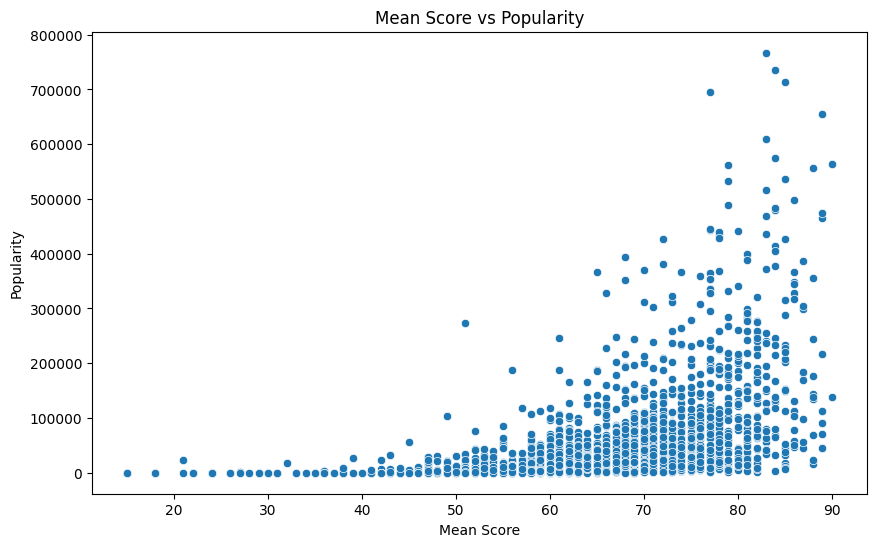

In [ ]:
# Scatter plot of meanScore vs popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='meanScore', y='popularity', data=outliers)

# Adding labels and title
plt.title('Mean Score vs Popularity')
plt.xlabel('Mean Score')
plt.ylabel('Popularity')
plt.show()


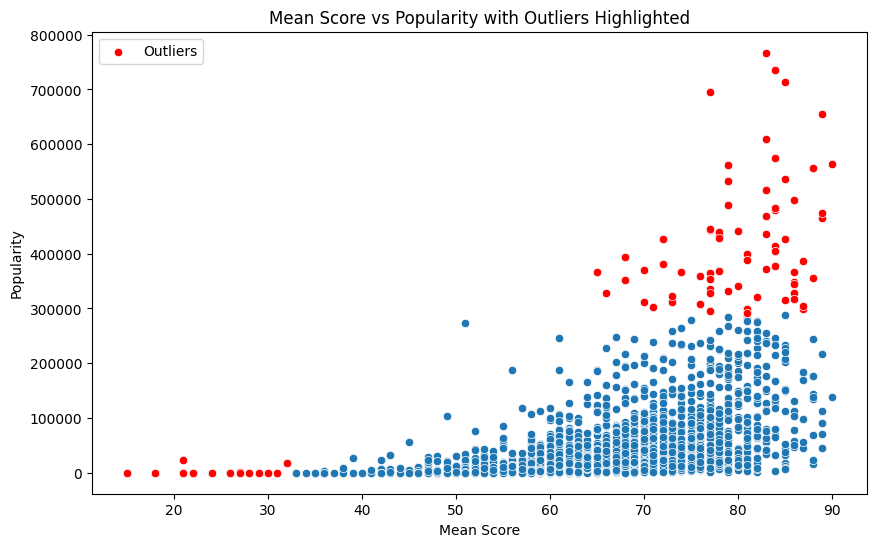

In [ ]:
# Scatter plot with Z-scores highlighting
plt.figure(figsize=(10, 6))

# Plotting all points
sns.scatterplot(x='meanScore', y='popularity', data=outliers)

# Highlighting points where Z-scores indicate outliers (Z > 3 or Z < -3)
outliers_highlight = outliers[(outliers['meanScore_z'].abs() > 3) | (outliers['popularity_z'].abs() > 3)]
sns.scatterplot(x='meanScore', y='popularity', data=outliers_highlight, color='red', label='Outliers')

# Adding labels and title
plt.title('Mean Score vs Popularity with Outliers Highlighted')
plt.xlabel('Mean Score')
plt.ylabel('Popularity')

plt.legend()
plt.show()


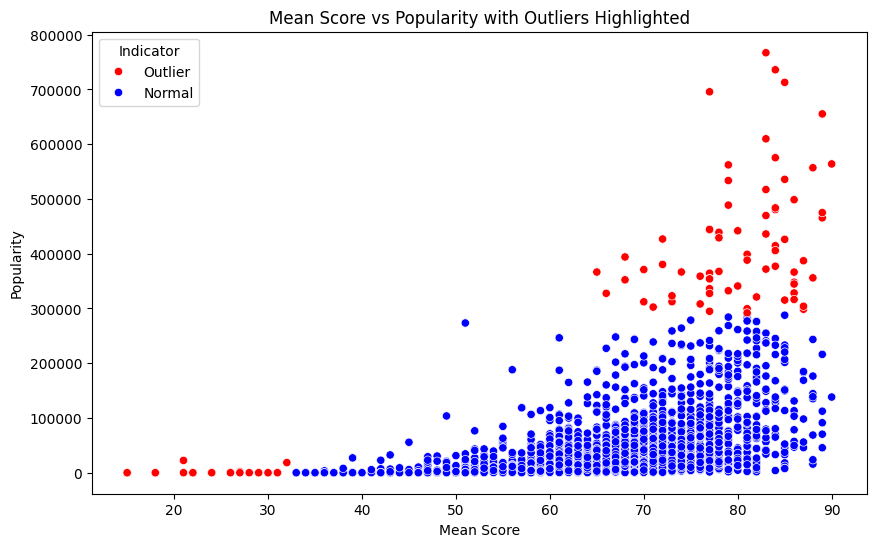

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Mark outliers based on Z-scores
outliers['Outlier Indicator'] = outliers.apply(lambda row: 'Outlier' if abs(row['meanScore_z']) > 3 or abs(row['popularity_z']) > 3 else 'Normal', axis=1)

# Set color palette
palette = {'Outlier': 'red', 'Normal': 'blue'}

# Create scatter plot with color mapping based on Outlier Indicator
plt.figure(figsize=(10, 6))

# Plot all points, color-coded by Outlier Indicator
sns.scatterplot(x='meanScore', y='popularity', hue='Outlier Indicator', palette=palette, data=outliers)

# Adding labels and title
plt.title('Mean Score vs Popularity with Outliers Highlighted')
plt.xlabel('Mean Score')
plt.ylabel('Popularity')

# Show legend
plt.legend(title='Indicator')
plt.show()


**ONGOING ANIMES WITH NO EPISODES - SORTED BY POPULARITY DESC**




In [ ]:
ongoing_anime = data_cleaned[(data_cleaned['ongoing'] == 1) |
                              (data_cleaned['Episodes'].isna()) |
                              (data_cleaned['Episodes'] == 'UNKNOWN')]

ongoing_anime_sorted = ongoing_anime.sort_values(by='popularity', ascending=False)

ongoing_anime_sorted.head()


,Episodes,duration,popularity,title,id,ongoing
1813,NaN,24.0,767004,Demon Slayer: Kimetsu no Yaiba,101922,1
2058,NaN,24.0,712846,JUJUTSU KAISEN,113415,1
1397,NaN,24.0,695667,My Hero Academia,21459,1
1320,NaN,24.0,609827,One-Punch Man,21087,1
1297,NaN,25.0,575293,Attack on Titan Season 2,20958,1


In [ ]:
ongoing_anime_sorted.shape

(1591, 6)

**COMPLETED ANIMES WITH EPISODES - SORTED BY POPULARITY DESC**

In [ ]:
completed_anime = data_cleaned[
    (data_cleaned['Episodes'] != 'UNKNOWN') &
    (data_cleaned['Episodes'].notna())
]
completed_anime.head()


,Episodes,duration,popularity,title,id,ongoing
0,26,24.0,366380,Cowboy Bebop,1,0
1,26,24.0,131123,Trigun,6,0
2,26,25.0,17739,Witch Hunter ROBIN,7,0
3,52,23.0,2440,Beet the Vandel Buster,8,0
4,145,23.0,28038,Eyeshield 21,15,0


In [ ]:
completed_anime.shape

(1181, 6)

In [ ]:
completed_anime.isnull().sum()

,0
Episodes,0
duration,0
popularity,0
title,0
id,0
ongoing,0


**CORRELATION ANALYSIS**

In [ ]:
episode_count_correlation = completed_anime['Episodes'].astype(float).corr(completed_anime['popularity'])

# Display the correlation result
print(episode_count_correlation, ', indicates a weak positive correlation')


0.1036026162348989 , indicates a weak positive correlation


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

completed_anime['Episodes'] = pd.to_numeric(completed_anime['Episodes'], errors='coerce')
completed_anime_sorted = completed_anime.sort_values(by='Episodes', ascending=True)

fig = px.scatter(
    completed_anime,
    x='Episodes',
    y='popularity',
    hover_name='title',
    title='Episodes vs Popularity',
    labels={'Episodes': 'Number of Episodes', 'popularity': 'Popularity'}
)


fig.show()

<ipython-input-46-519f59b16cba>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
new_data=pd.read_csv('/content/kaggle and batches.csv')

In [ ]:
new_data.head()

,id,title,format,duration,status,startDay,startMonth,startYear,meanScore,popularity,...,Premiered,Producers,Licensors,Studios,Source,Duration,Rank,Favorites,Scored_by,Members
0,1,Cowboy Bebop,TV,24.0,FINISHED,3.0,4.0,1998.0,86.0,366380,...,spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24.0,41.0,78525.0,914193.0,1771505.0
1,6,Trigun,TV,24.0,FINISHED,1.0,4.0,1998.0,80.0,131123,...,spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24.0,328.0,15035.0,356739.0,727252.0
2,7,Witch Hunter ROBIN,TV,25.0,FINISHED,2.0,7.0,2002.0,68.0,17739,...,summer 2002,"Bandai Visual, Dentsu, Victor Entertainment, T...","Funimation, Bandai Entertainment",Sunrise,Original,25.0,2764.0,613.0,42829.0,111931.0
3,8,Beet the Vandel Buster,TV,23.0,FINISHED,30.0,9.0,2004.0,65.0,2440,...,fall 2004,"TV Tokyo, Dentsu",Illumitoon Entertainment,Toei Animation,Manga,23.0,4240.0,14.0,6413.0,15001.0
4,15,Eyeshield 21,TV,23.0,FINISHED,6.0,4.0,2005.0,76.0,28038,...,spring 2005,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...","VIZ Media, Sentai Filmworks",Gallop,Manga,23.0,688.0,1997.0,86524.0,177688.0


In [ ]:
# Print the columns of the DataFrame
print(new_data.columns.tolist())


['id', 'title', 'format', 'duration', 'status', 'startDay', 'startMonth', 'startYear', 'meanScore', 'popularity', 'favourites', 'genres', 'scoreDistribution_amount', 'scoreDistribution_score', 'statusDistribution_score', 'statusDistribution_status', 'rankings_rank', 'rankings_context', 'tags', 'external_sites', 'Name', 'Score', 'Genres_1', 'Type', 'Episodes', 'Start_date', 'End_date', 'Premiered', 'Producers', 'Licensors', 'Studios', 'Source', 'Duration ', 'Rank', 'Favorites', 'Scored_by', 'Members']


In [ ]:
# Define the columns you want to keep
columns_to_keep = ['id', 'title', 'duration', 'popularity', 'Rank', 'meanScore']

# Filter the DataFrame to keep only the specified columns
filtered_data = new_data[columns_to_keep]

# Display the first few rows of the filtered DataFrame
print(filtered_data.head())


   id                   title  duration  popularity    Rank  meanScore
0   1            Cowboy Bebop      24.0      366380    41.0       86.0
1   6                  Trigun      24.0      131123   328.0       80.0
2   7      Witch Hunter ROBIN      25.0       17739  2764.0       68.0
3   8  Beet the Vandel Buster      23.0        2440  4240.0       65.0
4  15            Eyeshield 21      23.0       28038   688.0       76.0


In [ ]:
import pandas as pd

# Check the data types of the filtered DataFrame
print(filtered_data.dtypes)

# Convert 'duration' and 'popularity' to numeric, forcing non-numeric values to NaN
filtered_data['duration'] = pd.to_numeric(filtered_data['duration'], errors='coerce')
filtered_data['popularity'] = pd.to_numeric(filtered_data['popularity'], errors='coerce')

# Optionally, drop rows with NaN values in either 'duration' or 'popularity'
filtered_data_cleaned = filtered_data.dropna(subset=['duration', 'popularity'])


id              int64
title          object
duration      float64
popularity      int64
Rank          float64
meanScore     float64
dtype: object


<ipython-input-55-32fecf4a18c2>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-55-32fecf4a18c2>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Calculate the correlation between 'duration' and 'popularity'
duration_correlation = filtered_data_cleaned['duration'].corr(filtered_data_cleaned['popularity'])

# Print the correlation result
print(f"Correlation between Duration and Popularity: {duration_correlation}, duration does not significantly influence popularity")


Correlation between Duration and Popularity: -0.008021351358280405, duration does not significantly influence popularity


In [ ]:
import plotly.express as px
import pandas as pd

# Assuming filtered_data_cleaned is already prepared
# Create a scatter plot for Duration vs Popularity with hover for title
fig = px.scatter(
    filtered_data_cleaned,
    x='duration',
    y='popularity',
    hover_name='title',  # Display the title when hovering
    title='Duration vs Popularity',
    labels={'duration': 'Duration (in minutes)', 'popularity': 'Popularity'},
)

# Show the plot
fig.show()


**Predicting popularity**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [ ]:
df = pd.read_csv('/content/kaggle and batches.csv')


In [ ]:
df = df.dropna(subset=['startYear'])


In [ ]:
df['startYear'] = df['startYear'].astype(int)


In [ ]:
df.isnull().sum()

,0
id,0
title,180
format,0
duration,12
status,0
startDay,28
startMonth,20
startYear,0
meanScore,7
popularity,0


In [ ]:
# Features and target variable
X = df[['startYear']]
y = df['popularity']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Predict future popularity (e.g., for 2024, 2025, 2026)
future_years = pd.DataFrame({'startYear': [2024, 2025, 2026]})
future_predictions = model.predict(future_years)

# Show future predictions
for year, popularity in zip(future_years['startYear'], future_predictions):
    print(f'Predicted popularity for {year}: {popularity:.0f}')


Predicted popularity for 2024: 64240
Predicted popularity for 2025: 65636
Predicted popularity for 2026: 67033


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.0f}')


Mean Squared Error: 6420628090


Predicted Popularity for the Next 10 Years:
Year 2027: Predicted popularity = 68429
Year 2028: Predicted popularity = 69825
Year 2029: Predicted popularity = 71221
Year 2030: Predicted popularity = 72617
Year 2031: Predicted popularity = 74013
Year 2032: Predicted popularity = 75410
Year 2033: Predicted popularity = 76806
Year 2034: Predicted popularity = 78202
Year 2035: Predicted popularity = 79598
Year 2036: Predicted popularity = 80994

Mean Squared Error on Test Data: 6420628090
Root Mean Squared Error: 80129


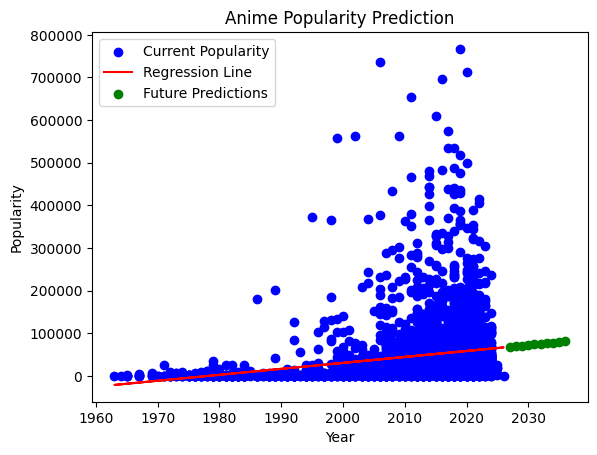

In [ ]:
last_year = df['startYear'].max()
future_years = pd.DataFrame({'startYear': list(range(last_year + 1, last_year + 11))})
future_predictions = model.predict(future_years)

# Show future predictions
print("Predicted Popularity for the Next 10 Years:")
for year, popularity in zip(future_years['startYear'], future_predictions):
    print(f'Year {year}: Predicted popularity = {popularity:.0f}')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'\nMean Squared Error on Test Data: {mse:.0f}')
rmse = np.sqrt(6420628090)
print(f'Root Mean Squared Error: {rmse:.0f}')


# Plotting the data and the regression line
plt.scatter(X, y, color='blue', label='Current Popularity')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter(future_years, future_predictions, color='green', label='Future Predictions')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title('Anime Popularity Prediction')
plt.legend()
plt.show()

In [ ]:
# Log-transform the popularity column
df['log_popularity'] = np.log(df['popularity'])

# Use log-transformed popularity as your target variable
y = df['log_popularity']


In [ ]:
# Predict on future data and convert back to the original scale
log_predictions = model.predict(future_years)
future_predictions = np.exp(log_predictions)  # Reverse the log transform


<ipython-input-24-8de3ef233cc4>:3: RuntimeWarning: overflow encountered in exp
  future_predictions = np.exp(log_predictions)  # Reverse the log transform


Predicted Popularity for the Next 10 Years:
Year 2027: Predicted popularity = 3792
Year 2028: Predicted popularity = 3792
Year 2029: Predicted popularity = 3792
Year 2030: Predicted popularity = 3792
Year 2031: Predicted popularity = 3792
Year 2032: Predicted popularity = 3792
Year 2033: Predicted popularity = 3792
Year 2034: Predicted popularity = 3792
Year 2035: Predicted popularity = 3792
Year 2036: Predicted popularity = 3792

Root Mean Squared Error on Test Data: 79487


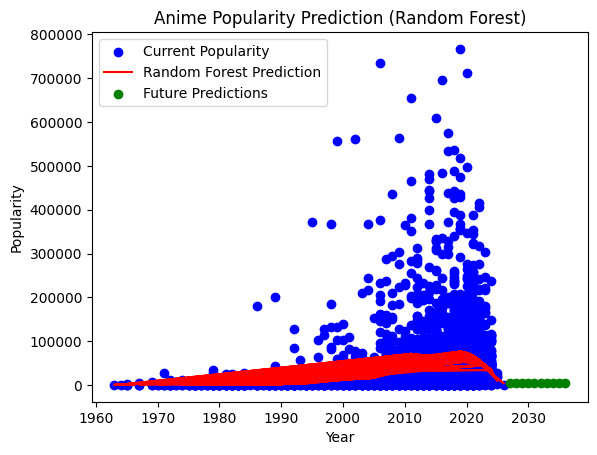

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Example data (use your actual dataframe here)


# Add your entire dataset
df = pd.read_csv('/content/kaggle and batches.csv')

# Drop rows with missing values in the 'startYear' column
df = df.dropna(subset=['startYear'])

# Convert startYear to integer if it's in float
df['startYear'] = df['startYear'].astype(int)

# Features and target variable
X = df[['startYear']]
y = df['popularity']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Predict future popularity for the next 10 years
last_year = df['startYear'].max()
future_years = pd.DataFrame({'startYear': list(range(last_year + 1, last_year + 11))})
future_predictions = rf_model.predict(future_years)

# Show future predictions
print("Predicted Popularity for the Next 10 Years:")
for year, popularity in zip(future_years['startYear'], future_predictions):
    print(f'Year {year}: Predicted popularity = {popularity:.0f}')

# Evaluate the model with RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'\nRoot Mean Squared Error on Test Data: {rmse:.0f}')

# Plotting the data and the Random Forest prediction
plt.scatter(X, y, color='blue', label='Current Popularity')
plt.plot(X, rf_model.predict(X), color='red', label='Random Forest Prediction')
plt.scatter(future_years, future_predictions, color='green', label='Future Predictions')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title('Anime Popularity Prediction (Random Forest)')
plt.legend()
plt.show()


**Genre Analysis**


In [ ]:
import pandas as pd
df=pd.read_csv('/content/kaggle and batches.csv')
df.head()

,id,title,format,duration,status,startDay,startMonth,startYear,meanScore,popularity,...,Premiered,Producers,Licensors,Studios,Source,Duration,Rank,Favorites,Scored_by,Members
0,1,Cowboy Bebop,TV,24.0,FINISHED,3.0,4.0,1998.0,86.0,366380,...,spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24.0,41.0,78525.0,914193.0,1771505.0
1,6,Trigun,TV,24.0,FINISHED,1.0,4.0,1998.0,80.0,131123,...,spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24.0,328.0,15035.0,356739.0,727252.0
2,7,Witch Hunter ROBIN,TV,25.0,FINISHED,2.0,7.0,2002.0,68.0,17739,...,summer 2002,"Bandai Visual, Dentsu, Victor Entertainment, T...","Funimation, Bandai Entertainment",Sunrise,Original,25.0,2764.0,613.0,42829.0,111931.0
3,8,Beet the Vandel Buster,TV,23.0,FINISHED,30.0,9.0,2004.0,65.0,2440,...,fall 2004,"TV Tokyo, Dentsu",Illumitoon Entertainment,Toei Animation,Manga,23.0,4240.0,14.0,6413.0,15001.0
4,15,Eyeshield 21,TV,23.0,FINISHED,6.0,4.0,2005.0,76.0,28038,...,spring 2005,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...","VIZ Media, Sentai Filmworks",Gallop,Manga,23.0,688.0,1997.0,86524.0,177688.0


In [ ]:
column_list = df.columns.tolist()
print(column_list)

['id', 'title', 'format', 'duration', 'status', 'startDay', 'startMonth', 'startYear', 'meanScore', 'popularity', 'favourites', 'genres', 'scoreDistribution_amount', 'scoreDistribution_score', 'statusDistribution_score', 'statusDistribution_status', 'rankings_rank', 'rankings_context', 'tags', 'external_sites', 'Name', 'Score', 'Genres_1', 'Type', 'Episodes', 'Start_date', 'End_date', 'Premiered', 'Producers', 'Licensors', 'Studios', 'Source', 'Duration ', 'Rank', 'Favorites', 'Scored_by', 'Members']


In [ ]:
df.drop(columns=['format', 'duration','status', 'startDay', 'startMonth','scoreDistribution_amount', 'scoreDistribution_score', 'statusDistribution_score', 'statusDistribution_status','Name', 'Score', 'Genres_1', 'Type', 'Episodes', 'Start_date', 'End_date', 'Premiered', 'Producers', 'Licensors', 'Studios', 'Source', 'Duration ', 'Rank', 'Favorites', 'Scored_by', 'Members'], inplace=True)



In [ ]:
df.head()

,id,title,startYear,meanScore,popularity,favourites,genres,rankings_rank,rankings_context,tags,external_sites
0,1,Cowboy Bebop,1998.0,86.0,366380,23689,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",48.0,highest rated all time,"['Space', 'Crime', 'Episodic', 'Ensemble Cast'...",Hulu
1,6,Trigun,1998.0,80.0,131123,5092,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",282.0,highest rated all time,"['Guns', 'Fugitive', 'Male Protagonist', 'Phil...",Netflix
2,7,Witch Hunter ROBIN,2002.0,68.0,17739,184,"['Action', 'Drama', 'Mystery', 'Supernatural']",24.0,highest rated,"['Female Protagonist', 'Police', 'Magic', 'Urb...",Crunchyroll
3,8,Beet the Vandel Buster,2004.0,65.0,2440,20,"['Adventure', 'Fantasy', 'Supernatural']",57.0,highest rated,"['Shounen', 'Spearplay', 'Swordplay']",Official Site
4,15,Eyeshield 21,2005.0,76.0,28038,640,"['Action', 'Comedy', 'Sports']",11.0,highest rated,"['American Football', 'Shounen', 'Male Protago...",Crunchyroll


In [ ]:
import ast

df['genres'] = df['genres'].apply(ast.literal_eval)

# Now explode the genres column
df_exploded = df.explode('genres', ignore_index=True)

# View the result
print(df_exploded)

          id                                              title  startYear  \
0          1                                       Cowboy Bebop     1998.0   
1          1                                       Cowboy Bebop     1998.0   
2          1                                       Cowboy Bebop     1998.0   
3          1                                       Cowboy Bebop     1998.0   
4          6                                             Trigun     1998.0   
...      ...                                                ...        ...   
8561  169927    Studio Apartment, Good Lighting, Angel Included     2024.0   
8562  169927    Studio Apartment, Good Lighting, Angel Included     2024.0   
8563  169935  The Strongest Tank's Labyrinth Raids -A Tank w...     2024.0   
8564  169935  The Strongest Tank's Labyrinth Raids -A Tank w...     2024.0   
8565  169935  The Strongest Tank's Labyrinth Raids -A Tank w...     2024.0   

      meanScore  popularity  favourites         genres  ranking

In [ ]:
df_exploded

,id,title,startYear,meanScore,popularity,favourites,genres,rankings_rank,rankings_context,tags,external_sites
0,1,Cowboy Bebop,1998.0,86.0,366380,23689,Action,48.0,highest rated all time,"['Space', 'Crime', 'Episodic', 'Ensemble Cast'...",Hulu
1,1,Cowboy Bebop,1998.0,86.0,366380,23689,Adventure,48.0,highest rated all time,"['Space', 'Crime', 'Episodic', 'Ensemble Cast'...",Hulu
2,1,Cowboy Bebop,1998.0,86.0,366380,23689,Drama,48.0,highest rated all time,"['Space', 'Crime', 'Episodic', 'Ensemble Cast'...",Hulu
3,1,Cowboy Bebop,1998.0,86.0,366380,23689,Sci-Fi,48.0,highest rated all time,"['Space', 'Crime', 'Episodic', 'Ensemble Cast'...",Hulu
4,6,Trigun,1998.0,80.0,131123,5092,Action,282.0,highest rated all time,"['Guns', 'Fugitive', 'Male Protagonist', 'Phil...",Netflix
...,...,...,...,...,...,...,...,...,...,...,...
8561,169927,"Studio Apartment, Good Lighting, Angel Included",2024.0,68.0,19675,497,Slice of Life,NaN,Unknown,"['Female Harem', 'Angels', 'Iyashikei', 'Male ...","Official Site, Twitter, Crunchyroll"
8562,169927,"Studio Apartment, Good Lighting, Angel Included",2024.0,68.0,19675,497,Supernatural,NaN,Unknown,"['Female Harem', 'Angels', 'Iyashikei', 'Male ...","Official Site, Twitter, Crunchyroll"
8563,169935,The Strongest Tank's Labyrinth Raids -A Tank w...,2024.0,59.0,22450,383,Action,NaN,Unknown,"['Magic', 'Female Harem', 'Male Protagonist', ...","Official Site, Twitter, Bilibili TV, Crunchyro..."
8564,169935,The Strongest Tank's Labyrinth Raids -A Tank w...,2024.0,59.0,22450,383,Adventure,NaN,Unknown,"['Magic', 'Female Harem', 'Male Protagonist', ...","Official Site, Twitter, Bilibili TV, Crunchyro..."


In [ ]:
df_exploded.to_csv('genre_analysis_exploded.csv', index=False)

**SPLIT TAGS**

In [ ]:
import pandas as pd
import ast
tag_df=pd.read_csv('/content/kaggle and batches.csv')
tag_df.head()

,id,title,format,duration,status,startDay,startMonth,startYear,meanScore,popularity,...,Premiered,Producers,Licensors,Studios,Source,Duration,Rank,Favorites,Scored_by,Members
0,1,Cowboy Bebop,TV,24.0,FINISHED,3.0,4.0,1998.0,86.0,366380,...,spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24.0,41.0,78525.0,914193.0,1771505.0
1,6,Trigun,TV,24.0,FINISHED,1.0,4.0,1998.0,80.0,131123,...,spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24.0,328.0,15035.0,356739.0,727252.0
2,7,Witch Hunter ROBIN,TV,25.0,FINISHED,2.0,7.0,2002.0,68.0,17739,...,summer 2002,"Bandai Visual, Dentsu, Victor Entertainment, T...","Funimation, Bandai Entertainment",Sunrise,Original,25.0,2764.0,613.0,42829.0,111931.0
3,8,Beet the Vandel Buster,TV,23.0,FINISHED,30.0,9.0,2004.0,65.0,2440,...,fall 2004,"TV Tokyo, Dentsu",Illumitoon Entertainment,Toei Animation,Manga,23.0,4240.0,14.0,6413.0,15001.0
4,15,Eyeshield 21,TV,23.0,FINISHED,6.0,4.0,2005.0,76.0,28038,...,spring 2005,"TV Tokyo, Nihon Ad Systems, TV Tokyo Music, Sh...","VIZ Media, Sentai Filmworks",Gallop,Manga,23.0,688.0,1997.0,86524.0,177688.0


In [ ]:
import pandas as pd
import ast

# Load the DataFrame
tag_df = pd.read_csv('/content/kaggle and batches.csv')

# Display the first few rows to understand the structure
print(tag_df.head())

# Specify the columns to keep
columns_to_keep = ['id', 'title', 'tags', 'startYear', 'popularity']

# Filter the DataFrame to keep only the specified columns
filtered_tag_df = tag_df[columns_to_keep]

# Display the filtered DataFrame
print(filtered_tag_df.head())


   id                   title format  duration    status  startDay  \
0   1            Cowboy Bebop     TV      24.0  FINISHED       3.0   
1   6                  Trigun     TV      24.0  FINISHED       1.0   
2   7      Witch Hunter ROBIN     TV      25.0  FINISHED       2.0   
3   8  Beet the Vandel Buster     TV      23.0  FINISHED      30.0   
4  15            Eyeshield 21     TV      23.0  FINISHED       6.0   

   startMonth  startYear  meanScore  popularity  ...    Premiered  \
0         4.0     1998.0       86.0      366380  ...  spring 1998   
1         4.0     1998.0       80.0      131123  ...  spring 1998   
2         7.0     2002.0       68.0       17739  ...  summer 2002   
3         9.0     2004.0       65.0        2440  ...    fall 2004   
4         4.0     2005.0       76.0       28038  ...  spring 2005   

                                           Producers  \
0                                      Bandai Visual   
1                               Victor Entertainment

In [ ]:
filtered_tag_df.head()

,id,title,tags,startYear,popularity
0,1,Cowboy Bebop,"['Space', 'Crime', 'Episodic', 'Ensemble Cast'...",1998.0,366380
1,6,Trigun,"['Guns', 'Fugitive', 'Male Protagonist', 'Phil...",1998.0,131123
2,7,Witch Hunter ROBIN,"['Female Protagonist', 'Police', 'Magic', 'Urb...",2002.0,17739
3,8,Beet the Vandel Buster,"['Shounen', 'Spearplay', 'Swordplay']",2004.0,2440
4,15,Eyeshield 21,"['American Football', 'Shounen', 'Male Protago...",2005.0,28038


**EXPLODE TAGS**

In [ ]:
filtered_tag_df['tags'] = filtered_tag_df['tags'].apply(ast.literal_eval)


<ipython-input-70-b87bced0624a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tag_df['tags'] = filtered_tag_df['tags'].apply(ast.literal_eval)


In [ ]:
exploded_tag_df = filtered_tag_df.explode('tags')


In [ ]:
print(exploded_tag_df.head())


   id         title                  tags  startYear  popularity
0   1  Cowboy Bebop                 Space     1998.0      366380
0   1  Cowboy Bebop                 Crime     1998.0      366380
0   1  Cowboy Bebop              Episodic     1998.0      366380
0   1  Cowboy Bebop         Ensemble Cast     1998.0      366380
0   1  Cowboy Bebop  Primarily Adult Cast     1998.0      366380


filter out male and female

In [ ]:
male_protagonists = exploded_tag_df[exploded_tag_df['tags'] == 'Male Protagonist']
female_protagonists = exploded_tag_df[exploded_tag_df['tags'] == 'Female Protagonist']

# Combine both DataFrames into one


In [ ]:
combined_protagonists = pd.concat([male_protagonists, female_protagonists], ignore_index=True)


In [ ]:
combined_protagonists.head()

,id,title,tags,startYear,popularity
0,1,Cowboy Bebop,Male Protagonist,1998.0,366380
1,6,Trigun,Male Protagonist,1998.0,131123
2,15,Eyeshield 21,Male Protagonist,2005.0,28038
3,16,Honey and Clover,Male Protagonist,2005.0,48976
4,18,Initial D 4th Stage,Male Protagonist,2004.0,38027


In [ ]:
combined_protagonists.to_csv('/content/protagonists_filtered.csv', index=False)


**CONCAT WITH GENRES**

In [ ]:
protagonists_df = pd.read_csv('/content/protagonists_filtered.csv')
kaggle_df = pd.read_csv('/content/kaggle and batches.csv')

In [ ]:
merged_df = pd.merge(protagonists_df, kaggle_df, on='id', how='inner')  # Use 'inner', 'left', 'right', or 'outer' depending on the type of join


In [ ]:
merged_df.columns

Index(['id', 'title_x', 'tags_x', 'startYear_x', 'popularity_x', 'title_y',
       'format', 'duration', 'status', 'startDay', 'startMonth', 'startYear_y',
       'meanScore', 'popularity_y', 'favourites', 'genres',
       'scoreDistribution_amount', 'scoreDistribution_score',
       'statusDistribution_score', 'statusDistribution_status',
       'rankings_rank', 'rankings_context', 'tags_y', 'external_sites', 'Name',
       'Score', 'Genres_1', 'Type', 'Episodes', 'Start_date', 'End_date',
       'Premiered', 'Producers', 'Licensors', 'Studios', 'Source', 'Duration ',
       'Rank', 'Favorites', 'Scored_by', 'Members'],
      dtype='object')

In [ ]:
filtered_df = merged_df[['id', 'title_x', 'popularity_x', 'genres', 'tags_x', 'startYear_x']]

# Renaming columns to be more intuitive
filtered_df = filtered_df.rename(columns={
    'title_x': 'title',
    'startYear_x': 'year',
    'popularity_x': 'popularity',
    'tags_x': 'tags'
})

# Display the filtered dataframe
filtered_df.head()

,id,title,popularity,genres,tags,year
0,1,Cowboy Bebop,366380,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",Male Protagonist,1998.0
1,6,Trigun,131123,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",Male Protagonist,1998.0
2,15,Eyeshield 21,28038,"['Action', 'Comedy', 'Sports']",Male Protagonist,2005.0
3,16,Honey and Clover,48976,"['Comedy', 'Drama', 'Romance', 'Slice of Life']",Male Protagonist,2005.0
4,18,Initial D 4th Stage,38027,"['Action', 'Drama', 'Sports']",Male Protagonist,2004.0


In [ ]:
# If genres are strings separated by commas, split them into lists
filtered_df['genres'] = filtered_df['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else x)

# Exploding the 'genres' column so that each genre has its own row
exploded_df = filtered_df.explode('genres')

# Display the exploded dataframe
print(exploded_df.head())

   id         title  popularity        genres              tags    year
0   1  Cowboy Bebop      366380     ['Action'  Male Protagonist  1998.0
0   1  Cowboy Bebop      366380   'Adventure'  Male Protagonist  1998.0
0   1  Cowboy Bebop      366380       'Drama'  Male Protagonist  1998.0
0   1  Cowboy Bebop      366380     'Sci-Fi']  Male Protagonist  1998.0
1   6        Trigun      131123     ['Action'  Male Protagonist  1998.0


In [ ]:
sorted_df = exploded_df.sort_values(by='id')


In [ ]:
sorted_df


,id,title,popularity,genres,tags,year
0,1,Cowboy Bebop,366380,['Action',Male Protagonist,1998.0
1277,1,Cowboy Bebop,366380,'Drama',Female Protagonist,1998.0
1277,1,Cowboy Bebop,366380,'Sci-Fi'],Female Protagonist,1998.0
1277,1,Cowboy Bebop,366380,'Adventure',Female Protagonist,1998.0
1277,1,Cowboy Bebop,366380,['Action',Female Protagonist,1998.0
...,...,...,...,...,...,...
1275,169927,"Studio Apartment, Good Lighting, Angel Included",19675,'Slice of Life',Male Protagonist,2024.0
1275,169927,"Studio Apartment, Good Lighting, Angel Included",19675,'Supernatural'],Male Protagonist,2024.0
1276,169935,The Strongest Tank's Labyrinth Raids -A Tank w...,22450,'Fantasy'],Male Protagonist,2024.0
1276,169935,The Strongest Tank's Labyrinth Raids -A Tank w...,22450,['Action',Male Protagonist,2024.0


In [ ]:
sorted_df.to_csv('/content/exploded_sorted_df.csv', index=False)


In [ ]:
new_df_test=pd.read_csv('/content/kaggle and batches.csv')

In [ ]:
new_df_test.columns

Index(['id', 'title', 'format', 'duration', 'status', 'startDay', 'startMonth',
       'startYear', 'meanScore', 'popularity', 'favourites', 'genres',
       'scoreDistribution_amount', 'scoreDistribution_score',
       'statusDistribution_score', 'statusDistribution_status',
       'rankings_rank', 'rankings_context', 'tags', 'external_sites', 'Name',
       'Score', 'Genres_1', 'Type', 'Episodes', 'Start_date', 'End_date',
       'Premiered', 'Producers', 'Licensors', 'Studios', 'Source', 'Duration ',
       'Rank', 'Favorites', 'Scored_by', 'Members'],
      dtype='object')

In [ ]:
filtered_df = new_df_test[['id', 'title', 'genres', 'startYear', 'popularity', 'tags']]


In [ ]:
filtered_df.head()

,id,title,genres,startYear,popularity,tags
0,1,Cowboy Bebop,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",1998.0,366380,"['Space', 'Crime', 'Episodic', 'Ensemble Cast'..."
1,6,Trigun,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",1998.0,131123,"['Guns', 'Fugitive', 'Male Protagonist', 'Phil..."
2,7,Witch Hunter ROBIN,"['Action', 'Drama', 'Mystery', 'Supernatural']",2002.0,17739,"['Female Protagonist', 'Police', 'Magic', 'Urb..."
3,8,Beet the Vandel Buster,"['Adventure', 'Fantasy', 'Supernatural']",2004.0,2440,"['Shounen', 'Spearplay', 'Swordplay']"
4,15,Eyeshield 21,"['Action', 'Comedy', 'Sports']",2005.0,28038,"['American Football', 'Shounen', 'Male Protago..."


In [ ]:
import pandas as pd

# Example DataFrame
df = filtered_df

# Create a DataFrame
df = pd.DataFrame(data)

# Step 1: Explode 'genres' and 'tags'
df_exploded = df.explode('genres').explode('tags')

# Step 2: Identify Male or Female Protagonist in tags
df_exploded['protagonist'] = df_exploded['tags'].apply(
    lambda x: 'Male Protagonist' if 'Male Protagonist' in x else ('Female Protagonist' if 'Female Protagonist' in x else 'None')
)

# Step 3: Create demographics column based on tags
def get_demographics(tags):
    demographics = ['Shounen', 'Shoujo', 'Josei', 'Seinen', 'Kodomo']
    matched_demographics = [demo for demo in demographics if demo in tags]
    return ', '.join(matched_demographics) if matched_demographics else 'Unknown'  # Join into a string

# Apply the updated function
df_exploded['demographics'] = df_exploded['tags'].apply(get_demographics)

# Step 4: Save the final DataFrame to a CSV file
output_file_path = '/content/processed_df1.csv'  # Update the path as needed
df_exploded.to_csv(output_file_path, index=False)

# Display confirmation message
print(f"Data saved as '{output_file_path}'")

Data saved as '/content/processed_df1.csv'


In [ ]:
df_exploded.to_csv('/content/processed_df.csv', index=False)
